imports

In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Carregue os dados do arquivo CSV em um DataFrame do Pandas
df = pd.read_csv('/content/teste - Página2.csv')

In [ ]:
df_novo = df[df['mes'] <= 8]
df_novo

,mes,chamados,acumulado
0,2,64,64
1,3,163,227
2,4,84,311
3,5,38,349
4,6,45,394
5,7,89,483
6,8,44,527


criar o modelo linear

In [ ]:
x = df_novo['mes']
y = df_novo ['acumulado']

xa = np.array(x).reshape(-1,1)
ya = np.array(y)

In [ ]:
modelo = LinearRegression()
modelo.fit(xa,ya)

LinearRegression()

In [ ]:
y_pred = modelo.predict(xa)
residuos = ya - y_pred
mse = np.mean(residuos ** 2)
confianca = 0.95
n = xa.shape[0]
t_valor = -1.96  # Valor crítico para um intervalo de confiança de 95% (t-distribution)
intervalo = t_valor * np.sqrt(mse / (n - 2))

In [ ]:
valor_setembro = modelo.predict(np.array([[9]]))
limite_inferior = valor_setembro + intervalo
limite_superior = valor_setembro - intervalo

# Valor real de y para setembro
y_setembro_real = 628  # Substitua pelo valor real de y para setembro

In [ ]:
print(f'O valor previsto para setembro varia entre {limite_inferior} e {limite_superior} para um intervalo de confiança de 95%')

O valor previsto para setembro varia entre [591.10617348] e [648.60811223] para um intervalo de confiança de 95%


representação gráfica

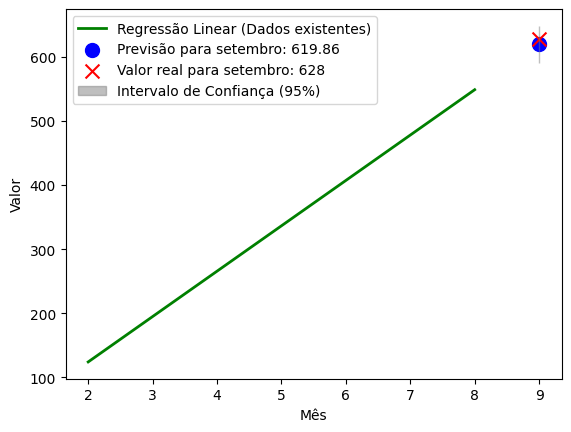

In [ ]:
# Visualizar os resultados
plt.plot(xa, y_pred, color='green', linewidth=2, label='Regressão Linear (Dados existentes)')
plt.scatter(9, valor_setembro, color='blue', label=f'Previsão para setembro: {valor_setembro[0]:.2f}', marker='o', s=100)
plt.scatter(9, y_setembro_real, color='red', label=f'Valor real para setembro: {y_setembro_real}', marker='x', s=100)
plt.fill_between([9], limite_inferior, limite_superior, color='gray', alpha=0.5, label='Intervalo de Confiança (95%)')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.legend()
plt.grid(False)

Conclusão: Valor real está dentro do previsto.
